In [103]:
import os
import random
import pickle
import matplotlib.pyplot as plt

from termcolor import cprint 

from pycolonies import Colonies
from pycolonies import colonies_client
from pycolonies import func_spec

colonies, colonyid, colony_prvkey, executorid, executor_prvkey = colonies_client()

In [115]:
!colonies fs sync -l classifier_results -d /root/classifier_results --keeplocal=false --yes
!colonies fs sync -l src -d /root/src --yes
!colonies fs sync -l notebook -d /root/examples --yes

 Uploading Untitled.ipynb 100% [===============] (34 MB/s)
 Uploading classifier.py 100% [===============] (19 MB/s)
 Uploading Colonies.ipynb 100% [===============] (463 MB/s)


In [106]:
snapshotname = str(random.randint(0,9**60))
snapshot = colonies.create_snapshot(colonyid, "src", snapshotname, executor_prvkey)
f = func_spec(func="execute",
              args=[],
              kwargs={
                "cmd":"python3",
                "args":["/tmp/helloworld/helloworld.py"],
                "keep_snapshots": False
              },
              fs=[ 
                  {
                    "snapshotid": snapshot["snapshotid"],
                    "dir": "/tmp/helloworld"
                  },
                  {
                    "label": "result",
                    "dir": "/tmp/helloworld/result",
                    "sync_on_completion": True  
                  }
              ],
              colonyid=colonyid,
              executortype="gpu-mlexecutor",
              priority=0,
              maxexectime=100,
              maxretries=3,
              maxwaittime=-1)

process = colonies.submit(f, executor_prvkey)

In [111]:
snapshotname = str(random.randint(0,9**60))
snapshot = colonies.create_snapshot(colonyid, "src", snapshotname, executor_prvkey)
f = func_spec(func="execute",
              args=[],
              kwargs={
                "cmd":"python3",
                "args":["/tmp/classifier/classifier.py"],
                "keep_snapshots": False
              },
              fs=[ 
                  {
                    "label": "src",
                    "snapshotid": snapshot["snapshotid"],
                    "dir": "/tmp/classifier"
                  }, 
                  {
                    "label": "classifier_results",
                    "dir": "/tmp/classifier/results",
                    "sync_on_completion": True  
                  }
              ],
              colonyid=colonyid,
              executortype="gpu-mlexecutor",
              priority=0,
              maxexectime=100,
              maxretries=3,
              maxwaittime=-1)

process = colonies.submit(f, executor_prvkey)

In [112]:
colonies.get_process(process["processid"], executor_prvkey)

{'processid': '089748b2723020c11fcaedaa9b0d0575f24708d091adc010e70b25775517f55b',
 'assignedexecutorid': 'e0703cdc00734d509b6ccc088fd32d796aefe43553d63afc81cb090fe8313971',
 'isassigned': True,
 'state': 1,
 'prioritytime': 1692607007178577387,
 'submissiontime': '2023-08-21T10:36:47.178577+02:00',
 'starttime': '2023-08-21T10:36:47.184622+02:00',
 'endtime': '0001-01-01T00:53:28+00:53',
 'waitdeadline': '0001-01-01T00:53:28+00:53',
 'execdeadline': '2023-08-21T10:38:27.184622+02:00',
 'retries': 0,
 'attributes': [],
 'spec': {'nodename': 'execute',
  'funcname': 'execute',
  'args': [],
  'kwargs': {'args': ['/tmp/classifier/classifier.py'],
   'cmd': 'python3',
   'keep_snapshots': False},
  'priority': 0,
  'maxwaittime': -1,
  'maxexectime': 100,
  'maxretries': 3,
  'conditions': {'colonyid': '4787a5071856a4acf702b2ffcea422e3237a679c681314113d86139461290cf4',
   'executorids': [],
   'executortype': 'gpu-mlexecutor',
   'dependencies': []},
  'label': '',
  'fs': [{'label': 'src'

In [114]:
for l in colonies.get_process_log(process["processid"], 500, -1, executor_prvkey):
    cprint(l["message"], end="")

2023-08-21 08:37:40.013195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
number of images:  3670
Found 3670 files belonging to 5 classes.


In [109]:
colonies.get_process(process["processid"], executor_prvkey)

{'processid': '3658f365623457e4e6765c8cfb9f8dd72b66ad8667a9843d35abee75550a2a97',
 'assignedexecutorid': '9202c6917664635132a988665f309c6ae9305d8e015ecada9247f595f5c5302d',
 'isassigned': True,
 'state': 2,
 'prioritytime': 1692606977937221370,
 'submissiontime': '2023-08-21T10:36:17.937221+02:00',
 'starttime': '2023-08-21T10:36:17.940667+02:00',
 'endtime': '2023-08-21T10:36:18.566374+02:00',
 'waitdeadline': '0001-01-01T00:53:28+00:53',
 'execdeadline': '2023-08-21T10:37:57.940667+02:00',
 'retries': 0,
 'attributes': [],
 'spec': {'nodename': 'execute',
  'funcname': 'execute',
  'args': [],
  'kwargs': {'args': ['/tmp/helloworld/helloworld.py'],
   'cmd': 'python3',
   'keep_snapshots': False},
  'priority': 0,
  'maxwaittime': -1,
  'maxexectime': 100,
  'maxretries': 3,
  'conditions': {'colonyid': '4787a5071856a4acf702b2ffcea422e3237a679c681314113d86139461290cf4',
   'executorids': [],
   'executortype': 'gpu-mlexecutor',
   'dependencies': []},
  'label': '',
  'fs': [{'label'

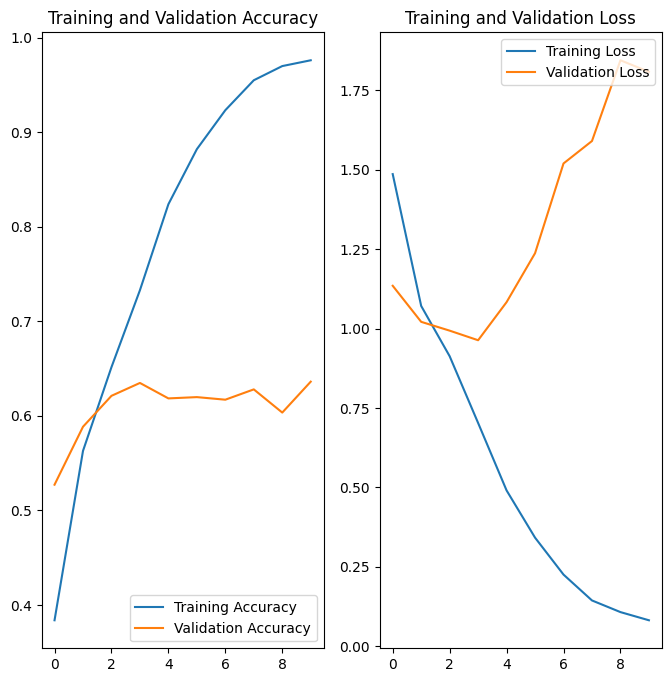

In [104]:
history = pickle.load(open( "/root/classifier_results/history.pickle", "rb"))
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()